## 📝<b> NB00 - Preprocessing </b>

In this Notebook, I will be running some tests to ensure my functions are importing and running correctly, while also saving my sample dataset as a JSON dataframe.

In [1]:
## I'm importing the packages that I'll be using throughout this assignment
import pandas as pd
import os
import json
import requests
import numpy as np

from functions import *

from lets_plot import *
LetsPlot.setup_html()


In [ ]:
## Creating a sample historical data variable using the get_historical_data function, London data, and selected dates
sample_historical_data = get_historical_data('GB', 'London', '2021-01-01', '2024-01-01')

In [ ]:
## Printing out the structure of sample_historical_data to inspect it - IF NEEDED. Currently saving all this as comments to limit the size of the output

## print("Top-level keys in the response:", sample_historical_data.keys())

## Checking if 'daily' key exists 
## if 'daily' in sample_historical_data:
    ## print(f"The 'daily' key exists with sub-keys: {sample_historical_data['daily'].keys()}")
## else:
    ## print("The 'daily' key is missing in the response.")

In [ ]:
print(f"The function returned an object of type: {type(sample_historical_data)}")
print(f"This dictionary has the following keys: {sample_historical_data.keys()}")
print(f"The information I want is under the following keys:")
print(f"  sample_historical_data['daily']['time'] \t\t\t- Sample: {sample_historical_data['daily']['time'][0:3]}")
print(f"  sample_historical_data['daily']['rain_sum'] \t- Sample: {sample_historical_data['daily']['rain_sum'][0:3]}")

The function returned an object of type: <class 'dict'>
This dictionary has the following keys: dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'daily_units', 'daily'])
The information I want is under the following keys:
  sample_historical_data['daily']['time'] 			- Sample: ['2021-01-01', '2021-01-02', '2021-01-03']
  sample_historical_data['daily']['rain_sum'] 	- Sample: [0.4, 0.0, 0.6]


In [ ]:
## Defining the selected country and city variables as GB and London for the test sample
selected_country = 'GB'
selected_city    = 'London'

In [ ]:
## Test-running the function
get_lat_lon(selected_country, selected_city)

(51.50853, -0.12574)

In [ ]:
## To make this easier, I am creating a function that will allow me to put in the country and city names and print the lat/lon
print_location_lat_lon('GB', 'London')

The latitude and longitude of GB, London is (51.50853, -0.12574)


In [ ]:
## Defining lat-lon variables with London's latitude and longitude
latitude = 51.50853
longitude = -0.12574

In [ ]:
## Testing the build_url function with London data and saving it as a url variable
url = build_url(latitude, longitude, '2021-01-01', '2024-01-01')
url

'https://archive-api.open-meteo.com/v1/archive?latitude=51.50853&longitude=-0.12574&start_date=2021-01-01&end_date=2024-01-01&daily=rain_sum&timezone=auto'

In [ ]:
## Retrieving weather data for London and storing it in the JSON-structured variable json_data
json_data = get_historical_data(selected_country, selected_city, '2021-01-01', '2024-01-01') 

In [ ]:
## Retrieving dates and rain sum for each day
dates    = json_data['daily']['time']
rain_sum = json_data['daily']['rain_sum']

## Checking if the length of dates is equal to the length of rain sum data (it should be, if I called the data correctly)
len(dates) == len(rain_sum) 

True

In [ ]:
## Creating final_data dictionary and saving previous work in it
final_data = {
    "country"  : selected_country,
    "city"     : selected_city,
    "date"     : json_data['daily']['time'],
    "rain_sum" : json_data['daily']['rain_sum'],
}
## Saving it as a JSON file in the data folder
with open('../data/daily_rain.json', 'w') as file:
    json.dump(final_data, file)

In [ ]:
## Opening and reading the JSON file
with open('../data/daily_rain.json', 'r') as file:
    data = json.load(file)
## Getting the keys for the dataframe (primarily did this due to several API-related errors while working)
data.keys()

dict_keys(['country', 'city', 'date', 'rain_sum'])

In [ ]:
## Convering data into pandas table and saving under df variable
df = pd.DataFrame(data)
## Calling top 5 variables of the table
df.head()

,country,city,date,rain_sum
0,GB,London,2021-01-01,0.4
1,GB,London,2021-01-02,0.0
2,GB,London,2021-01-03,0.6
3,GB,London,2021-01-04,2.3
4,GB,London,2021-01-05,2.1


In [ ]:
## Calling last 5 rows of the dataframe
df.tail()

,country,city,date,rain_sum
1091,GB,London,2023-12-28,0.4
1092,GB,London,2023-12-29,1.5
1093,GB,London,2023-12-30,3.6
1094,GB,London,2023-12-31,7.6
1095,GB,London,2024-01-01,10.5


<Axes: xlabel='date'>

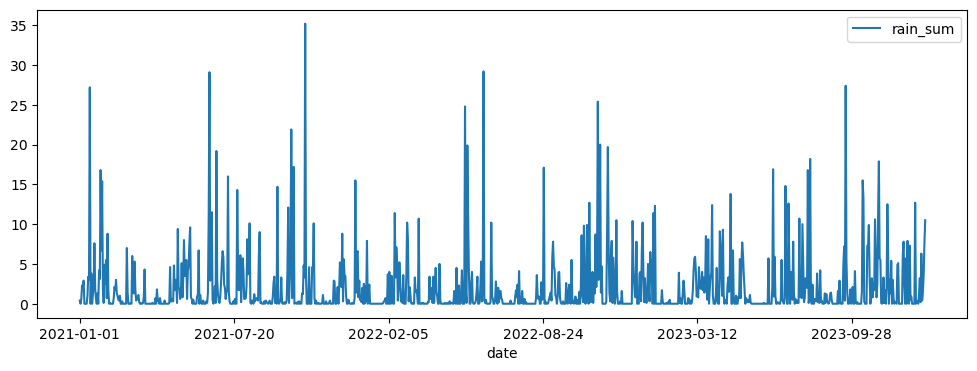

In [ ]:
## Plotting London data to see if there are any visible anomalies
df.plot(x='date', y='rain_sum', figsize=(12, 4))

Click here to navigate to the next section, [NB01 - City Selection](code/NB01-City-Selection.ipynb)